# Using 'Isotope' class for Picarro calculations

In [1]:
cd ..

/Users/AchilleTalon/Documents/GitHub/picarro_calculator/picarro-calculator


This notebook makes use of a new python class: Isotope.
This class and its methods are found in the module Picarro, which we import below.

In [2]:
import Picarro as pica

## Get a full run of the data
In the Picarro module, it is possible to directly call for a full run of the data.

This takes the form of:

   ```RUN = Picarro.FullRun(filename)```

and returns two instances of the Merged class.

In [3]:
O

Running the corrections for Oxygen 
 ... 
 ...
creating a directory to store the data
Checking: 1bb-19 ...
Standard dev is good
Checking: 1bnv-19 ...
Standard dev is good
Checking: 1grv-19 ...
Standard dev is good
Checking: 1lnn-19 ...
Standard dev is good
Checking: 1mnv-19 ...
Standard dev is good
Checking: 1trv-19 ...
Standard dev is good
Checking: 1vbk-19 ...
Standard dev is good
Checking: 1vsh-19 ...
Standard dev is good
Checking: 1xd-19 ...
Standard dev is good
Checking: 2bnv-19 ...
Standard dev is good
Checking: 2trv-19 ...
Standard dev is good
Checking: 2vsh-19 ...
Standard dev is good
Checking: H01-19 ...
Standard dev is good
Checking: H02-19 ...
Standard dev is good
Checking: H03-19 ...
Standard dev is good
Checking: H04-19 ...
Standard dev is good
Checking: os-KLP-10-19-WH ...
Standard dev is good
Checking: os-Nirob-04-19-WH ...
Standard dev too high get rid of measurement 1
Checking: os-Nirob-05-19-WH ...
Standard dev is good
Measured:0.53 --- Standard: 0.60 --- Difference: 

## Overview of the Isotope class

In the **Isotope** class, a variety of methods are available, so of which are used discreetly in the `FullRun()` function above.

They are:

For an initial treatment of the data:
```
readRaw() 
checkEmpty()
checkVolume()
runSummary()
```

For the computation of correction coefficients (workhorse of the class)
```
IsotopeSelect()
initMemCoeffs()
Optimize()
MemoryCorrection()
driftCorrect()
VSMOWcorrect()
```

For additional checks
```
getMeanSDs()
checkStandards()
```

For plotting convenience:

```
plotSummary()
memCorrPlot()
driftCorrPlot()
VSMOWCorrPlot()
```

## Other functions of the Picarro module

Below are a list of other functions available within the Picarro module:

```
1) Run()
2) FullRun()
3) Merge()
4) OverviewPlot()
5) DatatoCSV()
```

#### 1 Picarro.Run()

This function takes in two arguments: 
1. Isotope of choice: "O" or "D"
2. Filename: the path to csv data

Returns an object of class **Isotope**

An example usage: 

``` Isotope = Picarro.Run(isotope,path/to/file)```

#### 2 Picarro.FullRun()

This function takes in one argument:
1. Filename: the path to csv data

It returns one object of class **Merge**. This instance of class **Merged** has two class variables: O18 and D, which are themselves of Class **Isotope**, so all the above methods can be called on them.

Example usage:

``` RUN = Picarro.FullRun(path/to_file)```

*Note that this is what was done in the cells above, for the 'quick and dirty' full run of the data*



#### 3 Picarro.Merge()

This function takes two arguments; each must be an instance of class **Isotope**. It returns a pandas DataFrame, containing the summary data of the run.

Example usage: 

``` df = Picarro.Merge(Iso1,Iso2)```



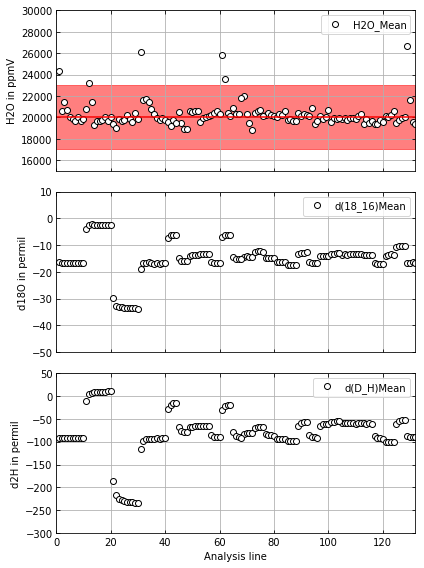

In [4]:
RUN.O18.plotSummary()

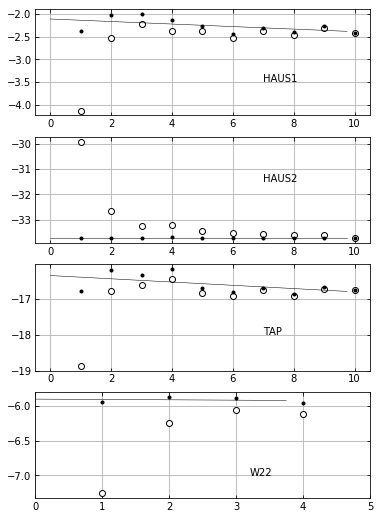

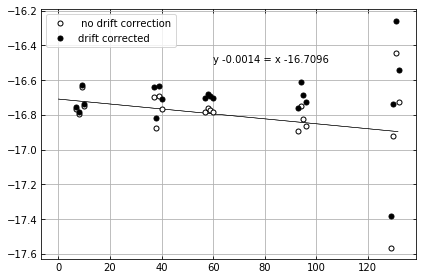

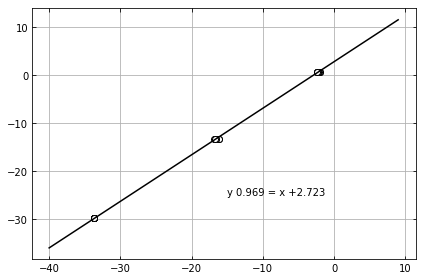

In [5]:
RUN.O18.memCorrPlot("O")
RUN.O18.driftCorrPlot("O")
RUN.O18.VSMOWCorrPlot("O")

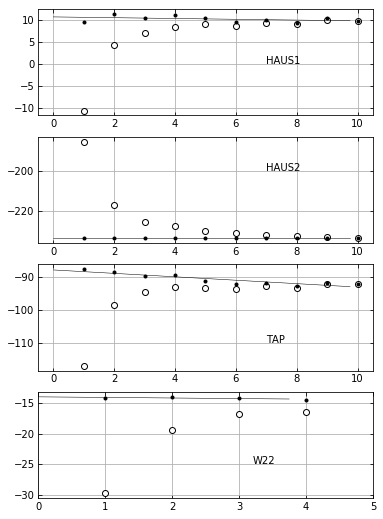

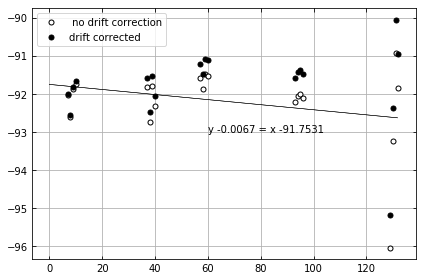

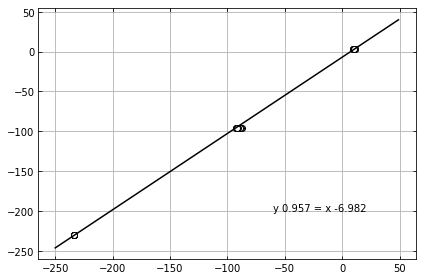

In [6]:
RUN.D.memCorrPlot("H")
RUN.D.driftCorrPlot("H")
RUN.D.VSMOWCorrPlot("H")

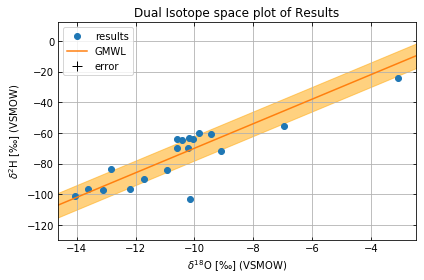

In [7]:
RUN.Plot()

#### 4 Picarro.OverviewPlot()

This function takes two arguments; each must be an instance of class **Isotope**. It enables the plotting of the summary data.

Example usage:

```Picarro.OverviewPlot(Iso1,Iso2)```


#### 5 Picarro.DatatoCSV()

This function takes two arguments; each must be an instance of class **Isotope**. The function writes the data to csv file for convenience of the user. 

Further development should include:

1. Checking that the file does not already exist.
2. Writing a new file it does not.

Example usage:

```Picarro.DatatoCSV(Iso1,Iso2)```



In [8]:
RUN.coeffs["H"]

1     0.751243
2     0.925766
3     0.965865
4     0.974204
5     0.985534
6     0.990070
7     0.994009
8     0.995992
9     0.997468
10    1.000000
Name: H, dtype: float64

In [9]:
RUN.suggestedReruns()

Checking for triplicates...
Some samples were not triplicated
Identifier 1  Identifier 2
H04-19        YD             -3.066435
Name: d18O vsmow, dtype: float64


Checking for high standard deviations ...
Suggested reruns for following samples, which had high standard deviations
Identifier 1  Identifier 2
TAP           _Control 3     -13.278999
HAUS1         _Standard        0.530411
TAP           _Standard      -13.301233
Name: d18O vsmow, dtype: float64


Checking for samples lying outside of the GWML ...
Suggested reruns for following samples, which were outside of the GMWL
Identifier 1       Identifier 2
1bb-19             YD             -10.199649
1mnv-19            YD             -12.175248
1vbk-19            YD             -10.438325
1vsh-19            YD             -10.601156
2bnv-19            YD              -9.098268
2vsh-19            YD              -9.856666
H01-19             YD             -12.846536
H04-19             YD              -3.066435
os-Nirob-04-19-WH  YD   

In [10]:
RUN.merge

,,d18O vsmow,d18O stdev. vsmow,d18O counts,d2H vsmow,d2H stdev. vsmow,d2H counts,inside GMWL
Identifier 1,Identifier 2,,,,,,,
1bb-19,YD,-10.199649,0.074716,4,-63.230466,0.498885,4,outside
1bnv-19,YD,-10.943549,0.083872,4,-83.909347,0.256531,4,inside
1grv-19,YD,-11.707811,0.043801,4,-89.947151,0.187341,4,inside
1lnn-19,YD,-10.046907,0.064785,4,-63.824242,0.444734,4,inside
1mnv-19,YD,-12.175248,0.040011,4,-96.263126,0.299886,4,outside
1trv-19,YD,-13.111874,0.055107,4,-97.108376,0.120199,4,inside
1vbk-19,YD,-10.438325,0.039774,4,-64.453504,0.492362,4,outside
1vsh-19,YD,-10.601156,0.024474,4,-64.052512,0.186541,4,outside
1xd-19,YD,-9.448373,0.028069,4,-60.646975,0.169988,4,inside


In [15]:
RUN.O18.raw

Line    Analysis  \
Identifier 1      Identifier 2 Inj Nr                     
TAP               Conditioning 1          1     P-11282   
                               2          2     P-11282   
                               3          3     P-11282   
                               4          4     P-11282   
                               5          5     P-11282   
                               6          6     P-11282   
                               7          7     P-11282   
                               8          8     P-11282   
                               9          9     P-11282   
                               10        10     P-11282   
HAUS1             Standard     1         11     P-11283   
                               2         12     P-11283   
                               3         13     P-11283   
                               4         14     P-11283   
                               5         15     P-11283   
                               6         16     P-11283   
                               7         17     P-11283   
                               8         18     P-11283   
                               9         19     P-11283   
                               10        20     P-11283   
HAUS2             Standard     1         21     P-11284   
                               2         22     P-11284   
                               3         23     P-11284   
                               4         24     P-11284   
                               5         25     P-11284   
                               6         26     P-11284   
                               7         27     P-11284   
                               8         28     P-11284   
                               9         29     P-11284   
                               10        30     P-11284   
...                                     ...         ...   
2vsh-19           YD           3        103     P-11301   
                               4        104     P-11301   
1bb-19            YD           1        105     P-11302   
                               2        106     P-11302   
                               3        107     P-11302   
                               4        108     P-11302   
1lnn-19           YD           1        109     P-11303   
                               2        110     P-11303   
                               3        111     P-11303   
                               4        112     P-11303   
1vbk-19           YD           1        113     P-11304   
                               2        114     P-11304   
                               3        115     P-11304   
                               4        116     P-11304   
os-KLP-10-19-WH   YD           1        117     P-11305   
                               2        118     P-11305   
                               3        119     P-11305   
                               4        120     P-11305   
os-Nirob-04-19-WH YD           1        121     P-11306   
                               2        122     P-11306   
                               3        123     P-11306   
                               4        124     P-11306   
os-Nirob-05-19-WH YD           1        125     P-11307   
                               2        126     P-11307   
                               3        127     P-11307   
                               4        128     P-11307   
TAP               Control      1        129     P-11308   
                               2        130     P-11308   
                               3        131     P-11308   
                               4        132     P-11308   

                                                    Time Code  \
Identifier 1      Identifier 2 Inj Nr                           
TAP               Conditioning 1          2019/11/18 13:02:06   
                               2          2019/11/18 13:11:20   
                               3          2019/11/18 13:20:32

In [13]:
xy1 = RUN.O18.memory.loc["TAP",["Line","d(18_16)mem_corrected"]][0:4]
xy2 = RUN.O18.memory.loc["TAP",["Line","d(18_16)mem_corrected"]][10:]

xy1.append(xy2)

Line  d(18_16)mem_corrected
Identifier 2 Inj Nr                              
Conditioning 7         7.0             -16.765000
             8         8.0             -16.793000
             9         9.0             -16.639000
             10       10.0             -16.752000
Standard     7        37.0             -16.695132
             8        38.0             -16.874096
             9        39.0             -16.690287
             10       40.0             -16.768000
Control      1        57.0             -16.782822
             2        58.0             -16.761716
             3        59.0             -16.773557
             4        60.0             -16.786760
             1        93.0             -16.893734
             2        94.0             -16.746950
             3        95.0             -16.823478
             4        96.0             -16.864102
             1       129.0             -17.566615
             2       130.0             -16.921875
             3       131.0             -16.444776
             4       132.0             -16.728129

In [14]:
RUN.O18.memory.loc["TAP",["Line","d(18_16)mem_corrected"]]

Line  d(18_16)mem_corrected
Identifier 2 Inj Nr                              
Conditioning 7         7.0             -16.765000
             8         8.0             -16.793000
             9         9.0             -16.639000
             10       10.0             -16.752000
Standard     1        31.0             -16.800418
             2        32.0             -16.202323
             3        33.0             -16.342094
             4        34.0             -16.182644
             5        35.0             -16.700500
             6        36.0             -16.820375
             7        37.0             -16.695132
             8        38.0             -16.874096
             9        39.0             -16.690287
             10       40.0             -16.768000
Control      1        57.0             -16.782822
             2        58.0             -16.761716
             3        59.0             -16.773557
             4        60.0             -16.786760
             1        93.0             -16.893734
             2        94.0             -16.746950
             3        95.0             -16.823478
             4        96.0             -16.864102
             1       129.0             -17.566615
             2       130.0             -16.921875
             3       131.0             -16.444776
             4       132.0             -16.728129